# Company 10K Entity Extraction

## Notebook Objective
This notebook demonstrates a Python script that utilizes AI21's Jamba LLM to automatically extract key information from company financial reports, such as 10-Ks or 10-Qs. The extracted data includes important financial metrics, management commentary, and legal proceedings, which are then organized into a structured JSON format.

By leveraging AI21's language model, the script can efficiently process unstructured text from financial documents, making it easier for analysts to access critical insights. This tool helps streamline the review of financial reports by converting dense, textual information into machine-readable, structured output for further analysis or integration into financial models.

### Install and Import Required Packages

In [ ]:
!pip install ai21

In [ ]:
!pip install PyPDF2

In [3]:
# import necessary libraries
from ai21 import AI21Client
from ai21.models.chat import ChatMessage
import PyPDF2
import json
# import necessary libraries
from ai21 import AI21Client
from ai21.models.chat import ChatMessage

### Create AI21 Client

In [4]:
#Paste in your API key or set to env var
api_key = ''

# create an instance of the AI21Client
client = AI21Client(
    api_key= api_key)

### Create path to financial report PDFs

In [6]:
# Create path to financial report PDF
pdf_path = ''

# Create a new file path for the .txt file from the parsed financial report PDF
file_path = ''

### Read PDFs from path and conver to text for LLM use

In [ ]:
# Open the PDF file
with open(pdf_path, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    # Extract text from each page
    for page_num in range(len(reader.pages)):
        page = reader.pages[page_num]
        text = page.extract_text()
        if text:
          # Open the file in 'append' mode ('a') and write the strings
          with open(file_path, 'a') as file:
            file.write(text)
            print(f"Page {page_num + 1}:\n{text}\n")

In [8]:
with open(file_path, 'r') as file:
    text_file = file.read()

# Creating Structured Data from Unstructured Data

### Create Prompt for Financial Information Output

In [9]:
# Define your desired JSON structure or allow the AI21 Jamba model to create one for you
json_structure = """
  {"financial_information": [{
  "company_name": ,
  "report_type": ,
  "report_date": ,
  "fiscal_quarter": ,
  "fiscal_year": ,
  "sections": {
    "financial_statements": {
      "income_statement": {
        "revenue": ,
        "net_income": ,
        "cost_of_revenue": ,
        "gross_profit": ,
        "operating_expenses": ,
        "operating_income": ,
        "interest_expense": ,
        "tax_expense": ,
        "net_income_per_share":
      },
      "balance_sheet": {
        "total_assets": ,
        "current_assets": ,
        "total_liabilities": ,
        "current_liabilities": ,
        "shareholders_equity": ,
        "long_term_debt": ,
        "cash_and_equivalents":
      },
      "cash_flow_statement": {
        "net_cash_from_operations": ,
        "net_cash_used_in_investing": ,
        "net_cash_from_financing": ,
        "cash_at_end_of_period":
      }
    },
    "management_discussion_and_analysis": {
      "overview": ,
      "business_trends": [],
      "future_outlook":
      },
    "risk_factors": [],
    "legal_proceedings": [
      {
        "case_name": ,
        "court": ,
        "status": ,
        "details":
      }
    ],
    "notes_to_financial_statements": [
      {
        "note_title": ,
        "note_description":
      },
      {
        "note_title": ,
        "note_description":
      }
    ]
   }
  ]
}
"""

In [10]:
fullprompt = text_file + "\n\n**********\n\n" + f"Create a json for the Part 1 Financial Information for the final month in the report that includes: {json_structure}"

system = "You're a stock analyst retrieving data from fiancial reports"

messages = [
    ChatMessage(content=system, role="system"),
    ChatMessage(content=fullprompt, role="user"),
]


### Check JSON Consistency

In [11]:
def is_json(data):
    try:
        json.loads(data)
        return True
    except ValueError:
        return False

### Run the Model Using the Above Prompt to Extract Financial Data

In [15]:
# customize the chat completions
def get_chat_completions(messages):
  chat_completions = client.chat.completions.create(
    messages=messages,
    model="jamba-1.5-large",
    max_tokens=2000, # To keep the response from running off the rails
    temperature=0.3,
    response_format={"type":"json_object"} # Forces a valid formatted JSON response
)
  return chat_completions

In [21]:
def model_output(chat_completions):
  chat_completions = get_chat_completions(messages)
  # Check the invalid JSON string
  while "Invalid JSON" in chat_completions.choices[0].message.content:
    print("Invalid JSON")
    chat_completions = get_chat_completions(messages)
  return chat_completions

In [19]:
print(model_output(messages).choices[0].message.content)

{
  "financial_information": [
    {
      "company_name": "Microsoft Corporation",
      "report_type": "Quarterly Report",
      "report_date": "October 24, 2023",
      "fiscal_quarter": 1,
      "fiscal_year": 2024,
      "sections": {
        "financial_statements": {
          "income_statement": {
            "revenue": 56517000000.0,
            "net_income": 22291000000.0,
            "cost_of_revenue": 16302000000.0,
            "gross_profit": 40215000000.0,
            "operating_expenses": 13320000000.0,
            "operating_income": 26895000000.0,
            "interest_expense": 525000000.0,
            "tax_expense": 4993000000.0,
            "net_income_per_share": 2.99
          },
          "balance_sheet": {
            "total_assets": 445785000000.0,
            "current_assets": 207586000000.0,
            "total_liabilities": 225071000000.0,
            "current_liabilities": 124792000000.0,
            "shareholders_equity": 220714000000.0,
            "long_te

### Interact with the Model and Visualize Outputs Using a Streamlit App

Using a simple Streamlit App, we are able to ingest the structured JSON output of the LLM and view as a consistent and repeatable report.

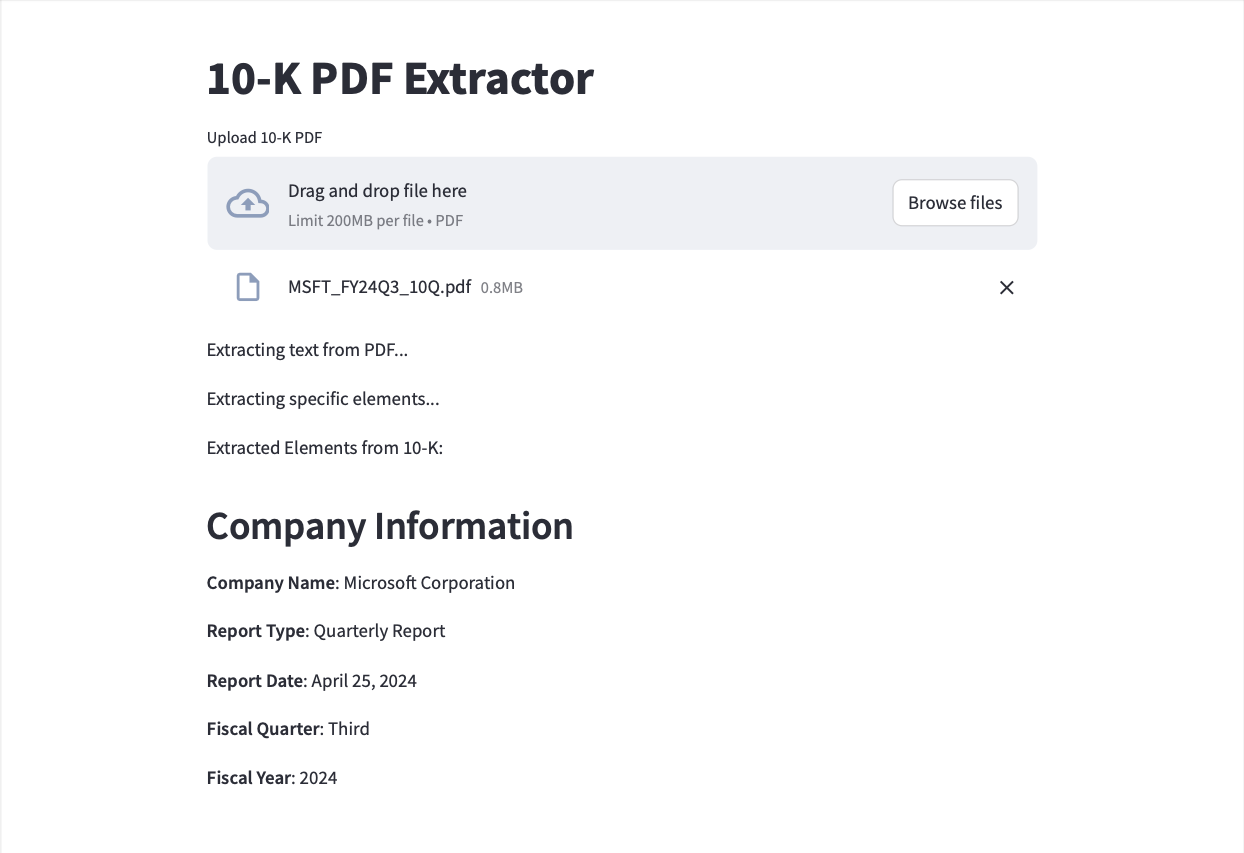

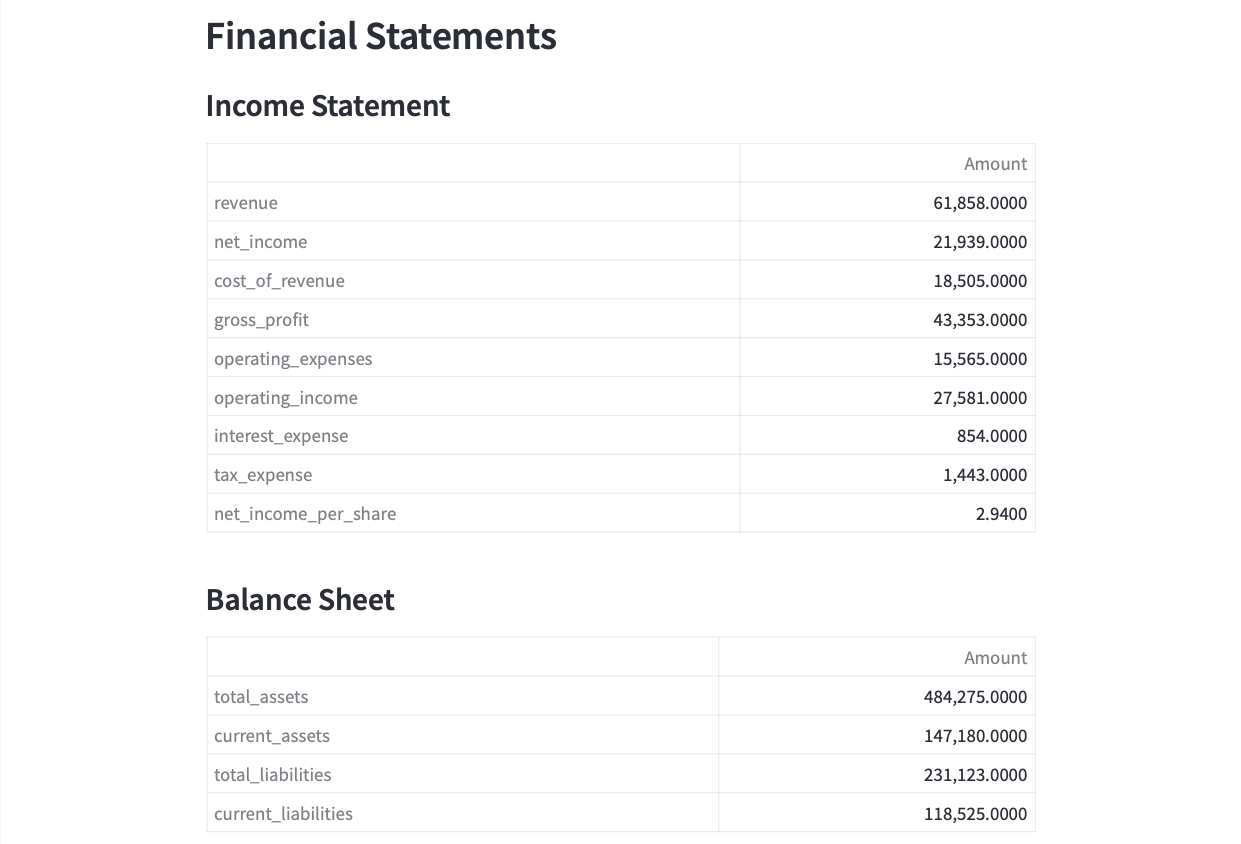

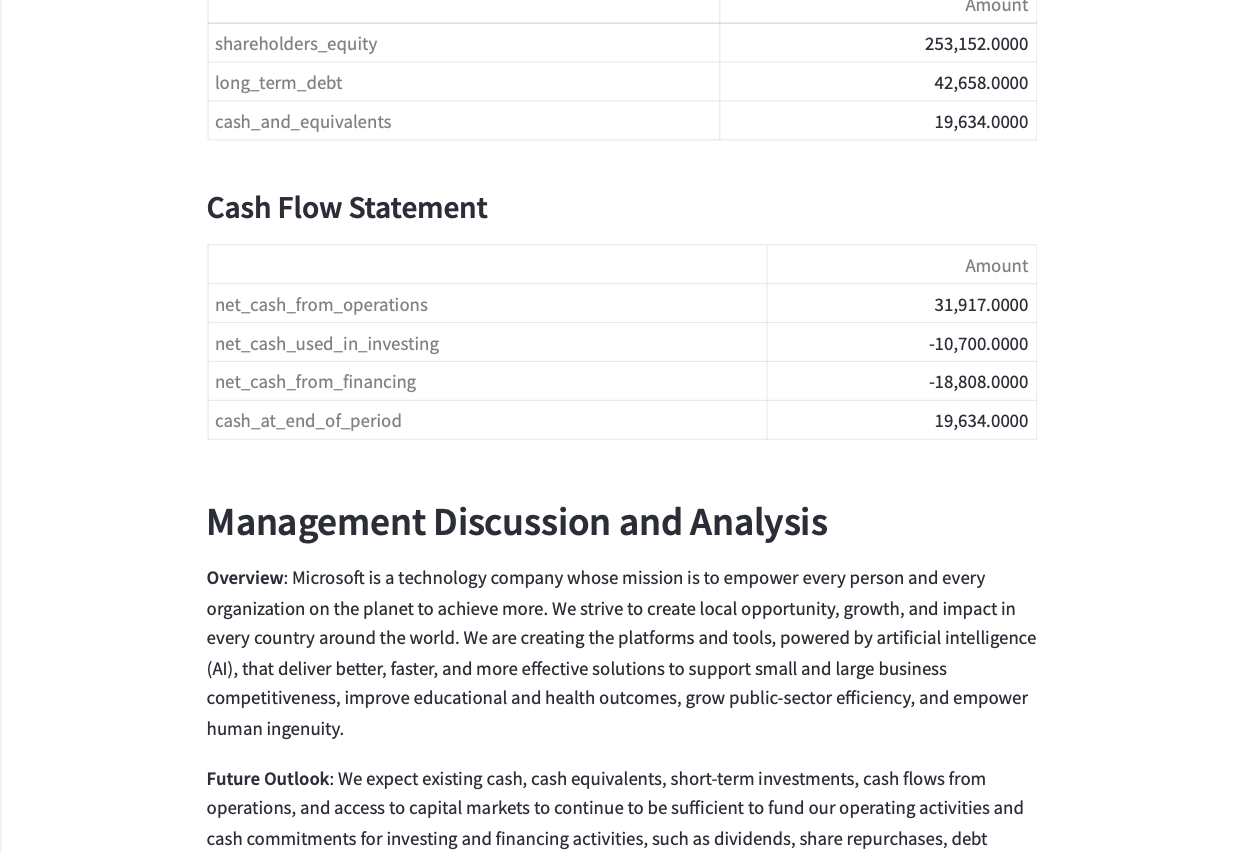

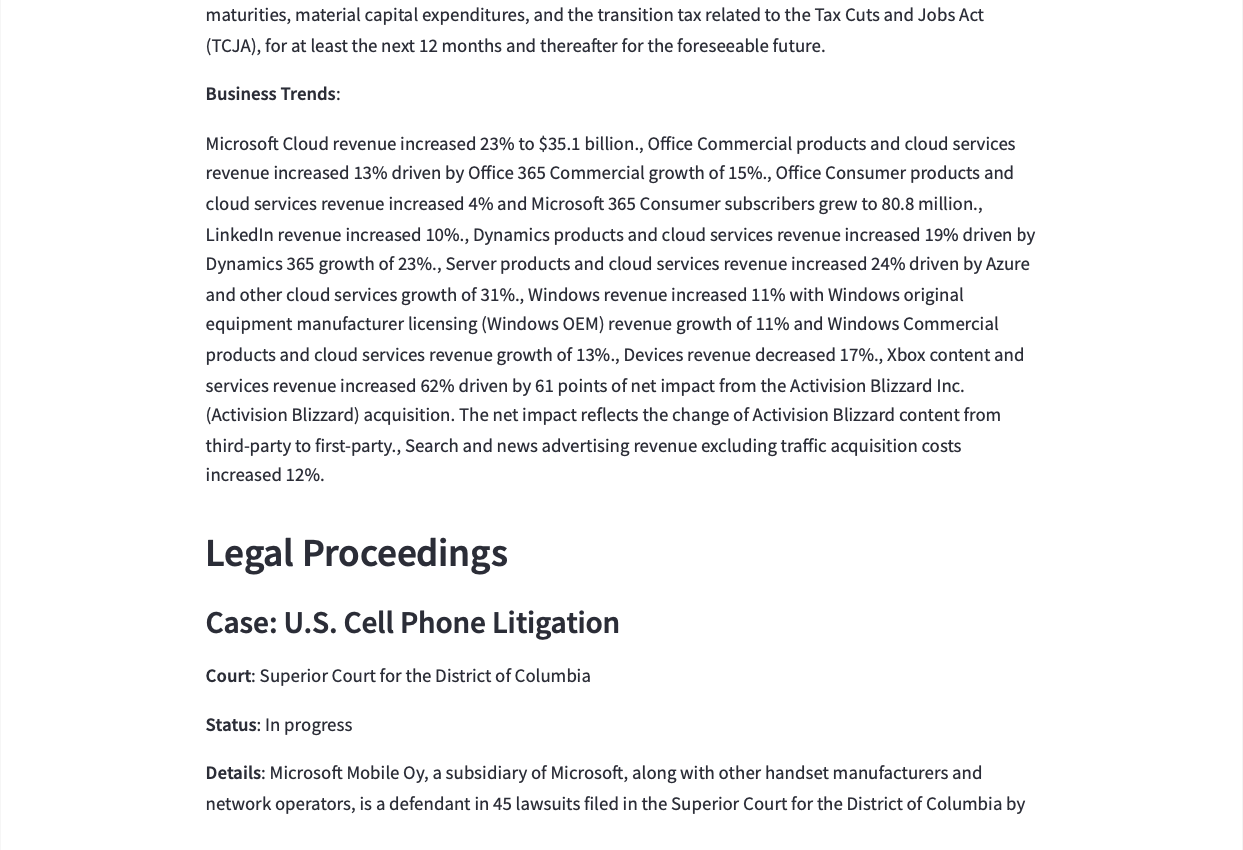

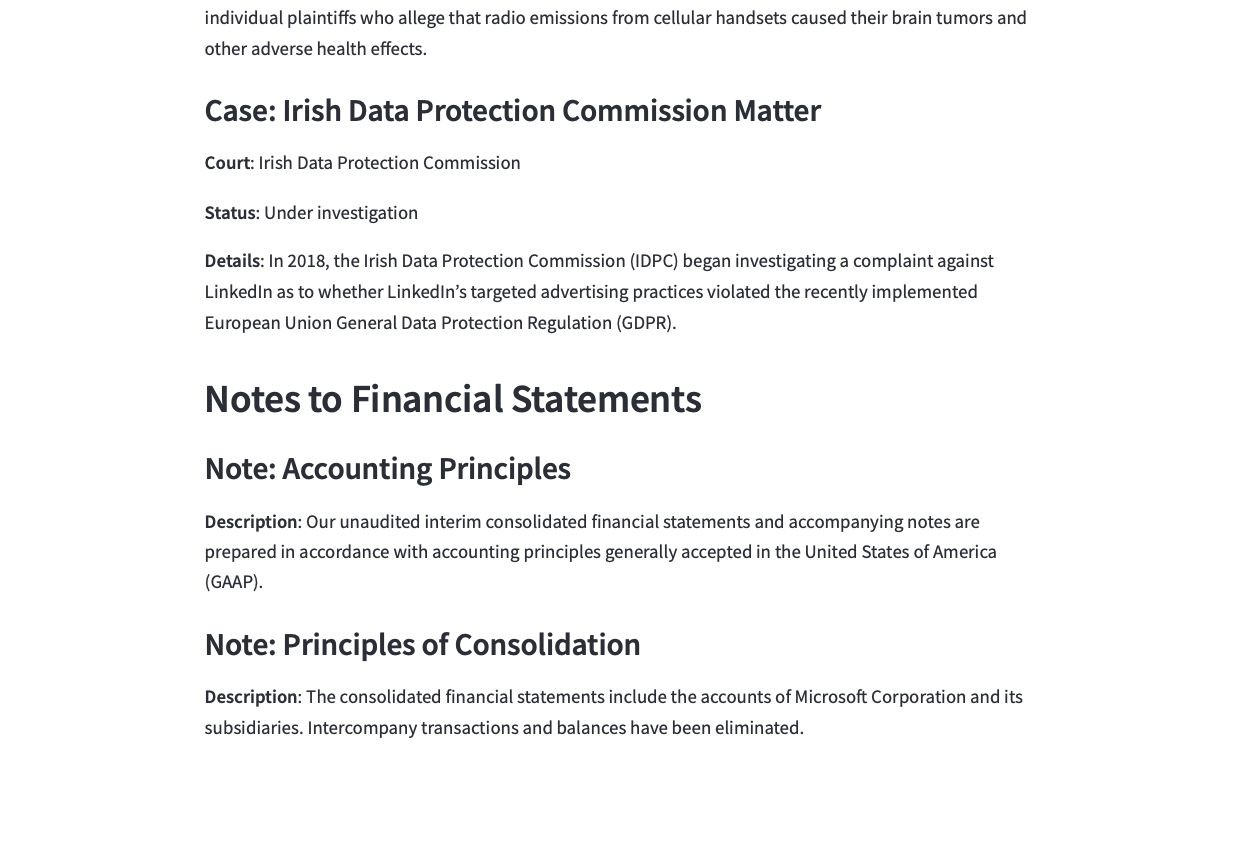